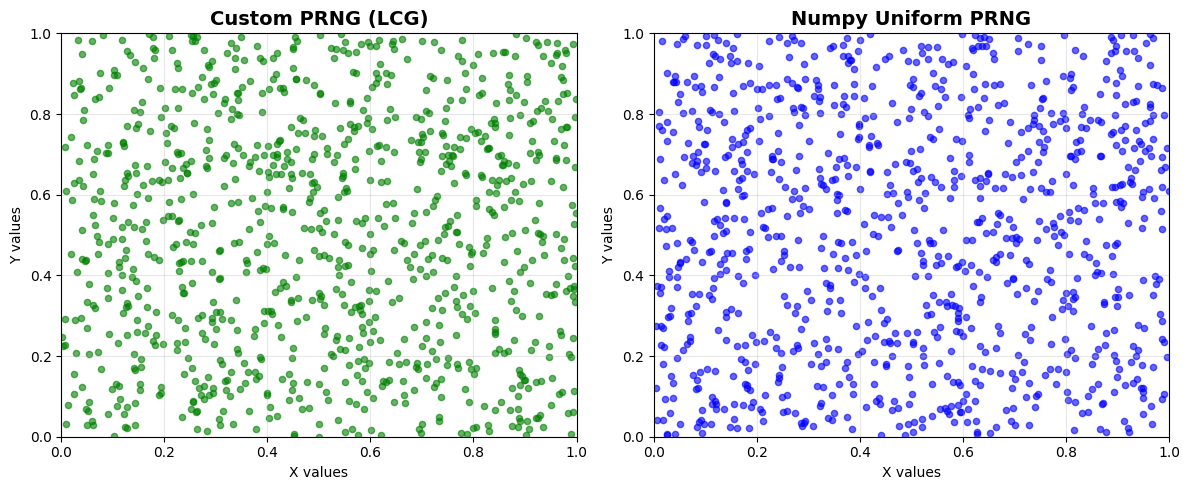

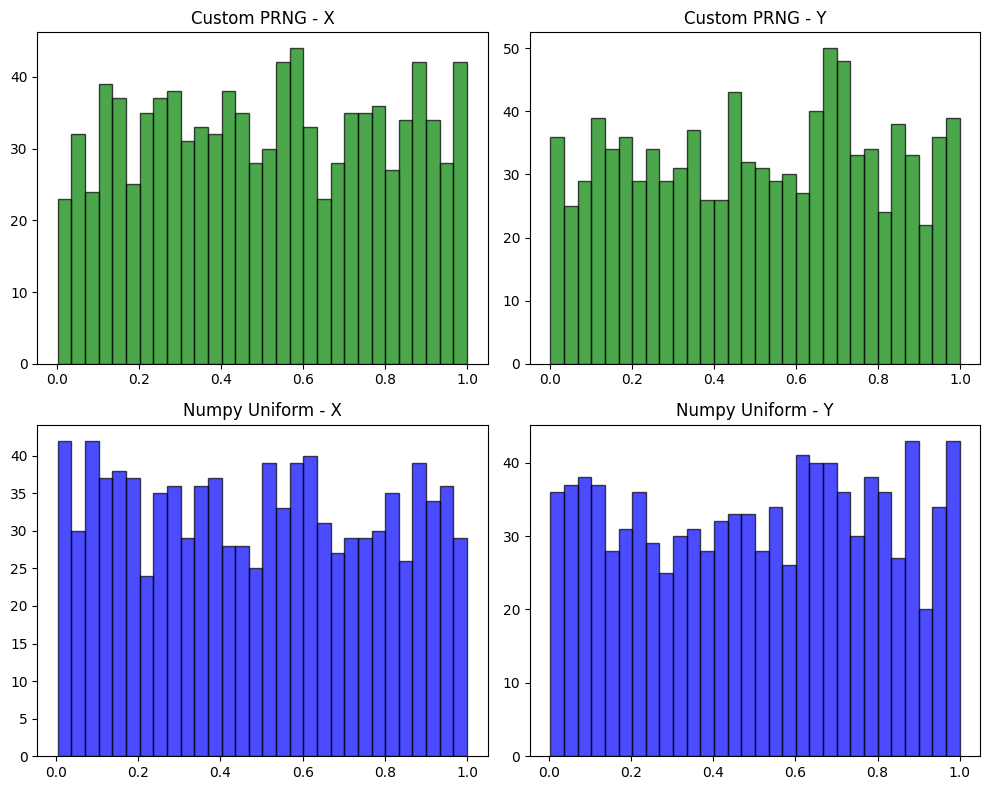

=== PRNG Comparison ===
Custom PRNG - Mean X: 0.511, Std X: 0.285
Custom PRNG - Mean Y: 0.507, Std Y: 0.288
Numpy     - Mean X: 0.490, Std X: 0.292
Numpy     - Mean Y: 0.507, Std Y: 0.292

=== Kolmogorov-Smirnov Test ===
Custom PRNG X: D-stat=0.0277, p-value=0.4194
Numpy   X: D-stat=0.0300, p-value=0.3244

=== Correlation Check ===
Custom PRNG correlation (X,Y): 0.0147
Numpy correlation (X,Y): 0.0293


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, pearsonr

# Custom PRNG using Linear Congruential Generator
class CustomPRNG:
    def __init__(self, seed=12345, a=1664525, c=1013904223, m=2**32):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m  # Normalize to [0,1)

    def generate_points(self, n):
        return [self.next() for _ in range(n)]

# --- Generate Data ---
def generate_data(n_points=1000, seed=42):
    custom_rng = CustomPRNG(seed=seed)
    prng_x = custom_rng.generate_points(n_points)
    prng_y = custom_rng.generate_points(n_points)

    np.random.seed(seed)
    uniform_x = np.random.uniform(0, 1, n_points)
    uniform_y = np.random.uniform(0, 1, n_points)

    return (prng_x, prng_y, uniform_x, uniform_y)

# --- Visualization ---
def plot_scatter(prng_x, prng_y, uniform_x, uniform_y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.scatter(prng_x, prng_y, alpha=0.6, s=20, color='green')
    ax1.set_title('Custom PRNG (LCG)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('X values')
    ax1.set_ylabel('Y values')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax2.scatter(uniform_x, uniform_y, alpha=0.6, s=20, color='blue')
    ax2.set_title('Numpy Uniform PRNG', fontsize=14, fontweight='bold')
    ax2.set_xlabel('X values')
    ax2.set_ylabel('Y values')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)

    plt.tight_layout()
    plt.savefig('custom_vs_numpy_prng.pdf')
    plt.show()

def plot_histograms(prng_x, prng_y, uniform_x, uniform_y):
    fig, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(10, 8))

    ax3.hist(prng_x, bins=30, alpha=0.7, color='green', edgecolor='black')
    ax3.set_title('Custom PRNG - X')

    ax4.hist(prng_y, bins=30, alpha=0.7, color='green', edgecolor='black')
    ax4.set_title('Custom PRNG - Y')

    ax5.hist(uniform_x, bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax5.set_title('Numpy Uniform - X')

    ax6.hist(uniform_y, bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax6.set_title('Numpy Uniform - Y')

    plt.tight_layout()
    plt.savefig('custom_prng_histograms.pdf')
    plt.show()

# --- Statistics & Tests ---
def analyze_statistics(prng_x, prng_y, uniform_x, uniform_y):
    print("=== PRNG Comparison ===")
    print(f"Custom PRNG - Mean X: {np.mean(prng_x):.3f}, Std X: {np.std(prng_x):.3f}")
    print(f"Custom PRNG - Mean Y: {np.mean(prng_y):.3f}, Std Y: {np.std(prng_y):.3f}")
    print(f"Numpy     - Mean X: {np.mean(uniform_x):.3f}, Std X: {np.std(uniform_x):.3f}")
    print(f"Numpy     - Mean Y: {np.mean(uniform_y):.3f}, Std Y: {np.std(uniform_y):.3f}")

    # Kolmogorov-Smirnov test for uniformity
    ks_custom_x = kstest(prng_x, 'uniform')
    ks_numpy_x = kstest(uniform_x, 'uniform')
    print("\n=== Kolmogorov-Smirnov Test ===")
    print(f"Custom PRNG X: D-stat={ks_custom_x.statistic:.4f}, p-value={ks_custom_x.pvalue:.4f}")
    print(f"Numpy   X: D-stat={ks_numpy_x.statistic:.4f}, p-value={ks_numpy_x.pvalue:.4f}")

    # Correlation check
    corr_custom, _ = pearsonr(prng_x, prng_y)
    corr_numpy, _ = pearsonr(uniform_x, uniform_y)
    print("\n=== Correlation Check ===")
    print(f"Custom PRNG correlation (X,Y): {corr_custom:.4f}")
    print(f"Numpy correlation (X,Y): {corr_numpy:.4f}")

# --- Main Execution ---
if __name__ == "__main__":
    n_points = 1000
    seed = 42

    prng_x, prng_y, uniform_x, uniform_y = generate_data(n_points, seed)

    plot_scatter(prng_x, prng_y, uniform_x, uniform_y)
    plot_histograms(prng_x, prng_y, uniform_x, uniform_y)
    analyze_statistics(prng_x, prng_y, uniform_x, uniform_y)
